In [ ]:
!pip install tensorflow==1.14.0

     |████████████████████████████████| 109.2MB 38kB/s 
     |████████████████████████████████| 3.2MB 45.3MB/s 
     |████████████████████████████████| 51kB 6.0MB/s 
     |████████████████████████████████| 491kB 50.4MB/s 
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0


In [ ]:
!pip install keras==2.3.1

     |████████████████████████████████| 378kB 10.8MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [ ]:
import tensorflow as tf
import keras
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.applications.resnet import ResNet50
from keras.applications.resnet import ResNet50
from keras.applications.resnet import decode_predictions
from keras.applications.resnet import preprocess_input
from keras.models import Model,Sequential
from keras.layers import Input,UpSampling2D,Flatten,BatchNormalization,Dense,Dropout,GlobalAveragePooling2D
from keras import optimizers
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from glob import glob
from PIL import Image

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [ ]:
!nvidia-smi

Sun Oct 18 08:49:57 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8     7W /  75W |      0MiB /  7611MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Data is under 'Advance Computer Vision - Part1' tab in dashboard name as 'Sample Dataset'

In [ ]:
!unzip /content/data.zip

unzip:  cannot find or open /content/data.zip, /content/data.zip.zip or /content/data.zip.ZIP.


In [ ]:
IMAGE_SIZE = [224, 224]#Give dataset path
train = '/content/data/train'
test = '/content/data/test'

In [ ]:
# useful for getting number of classes
folders = glob('/content/data/train/*')
print(len(folders))
num_classes = 4
nb_epochs = 10

0


In [ ]:
# Fixed for our dataset
NUM_CLASSES = 4

# Fixed for Cats & Dogs color images
CHANNELS = 3

IMAGE_RESIZE = 224
RESNET50_POOLING_AVERAGE = 'avg'
DENSE_LAYER_ACTIVATION = 'softmax'
OBJECTIVE_FUNCTION = 'categorical_crossentropy'

# Common accuracy metric for all outputs, but can use different metrics for different output
LOSS_METRICS = ['accuracy']

# EARLY_STOP_PATIENCE must be < NUM_EPOCHS
NUM_EPOCHS = 10
EARLY_STOP_PATIENCE = 3

# These steps value should be proper FACTOR of no.-of-images in train & valid folders respectively
# Training images processed in each step would be no.-of-train-images / STEPS_PER_EPOCH_TRAINING
STEPS_PER_EPOCH_TRAINING = 10
STEPS_PER_EPOCH_VALIDATION = 10

# These steps value should be proper FACTOR of no.-of-images in train & valid folders respectively
# NOTE that these BATCH* are for Keras ImageDataGenerator batching to fill epoch step input
BATCH_SIZE_TRAINING = 100
BATCH_SIZE_VALIDATION = 100

In [ ]:
resnet=Res Net50(include_top=False, weights='imagenet',input_shape=IMAGE_SIZE + [3])


94773248/94765736 [==============================] - 8s 0us/step


In [ ]:
from keras.models import Model,Sequential
model = Sequential()

# 1st layer as the lumpsum weights from resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
# NOTE that this layer will be set below as NOT TRAINABLE, i.e., use it as is
model.add(ResNet50(include_top = False, pooling = RESNET50_POOLING_AVERAGE, weights = 'imagenet'))

# 2nd layer as Dense for 2-class classification, i.e., dog or cat using SoftMax activation
model.add(Dense(NUM_CLASSES, activation = DENSE_LAYER_ACTIVATION))

# Say not to train first layer (ResNet) model as it is already trained
model.layers[0].trainable = False

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 8196      
Total params: 23,595,908
Trainable params: 8,196
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
from keras import optimizers

sgd = optimizers.SGD(lr = 0.01, decay = 1e-6, momentum = 0.9, nesterov = True)
model.compile(optimizer = sgd, loss = OBJECTIVE_FUNCTION, metrics = LOSS_METRICS)

In [ ]:
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

image_size = IMAGE_RESIZE

data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = data_generator.flow_from_directory(
        '/content/data/train',
        target_size=(image_size, image_size),
        batch_size=BATCH_SIZE_TRAINING,
        class_mode='categorical')


validation_generator = data_generator.flow_from_directory(
        '/content/data/test',
        target_size=(image_size, image_size),
        batch_size=BATCH_SIZE_VALIDATION,
        class_mode='categorical')

FileNotFoundError: ignored

In [ ]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')


# Data Augmentation
test_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
fit_history = model.fit_generator(
        train_generator,
        steps_per_epoch=STEPS_PER_EPOCH_TRAINING,
        epochs = NUM_EPOCHS,
        validation_data=validation_generator,
        validation_steps=STEPS_PER_EPOCH_VALIDATION
        
)

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Epoch 1/10
10/10 [==============================] - 439s 44s/step - loss: 0.5337 - accuracy: 0.8021 - val_loss: 0.0503 - val_accuracy: 0.9776
Epoch 2/10
10/10 [==============================] - 428s 43s/step - loss: 0.0399 - accuracy: 0.9958 - val_loss: 0.0349 - val_accuracy: 0.9809
Epoch 3/10
10/10 [==============================] - 424s 42s/step - loss: 0.0154 - accuracy: 1.0000 - val_loss: 0.0452 - val_accuracy: 0.9848
Epoch 4/10
10/10 [==============================] - 430s 43s/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 0.0258 - val_accuracy: 0.9821
Epoch 5/10
10/10 [==============================] - 427s 43s/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.0091 - val_accuracy: 0.9832
Epoch 6/10
10/10 [==============================] - 423s 42s/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.0592 - val_accuracy: 0.9778
Epoch 7/10
10/10 [==============================] - 429s 43s/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.0330 - val_accuracy: 0.9821
Epoch 

In [ ]:
model.save("mymodelresnet1.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
import numpy as np

from keras.preprocessing import image

In [ ]:
from tensorflow.python.keras.models import load_model

In [ ]:
test_image = image.load_img('/content/data/test/backpack/00000027.png', target_size = (224, 224))

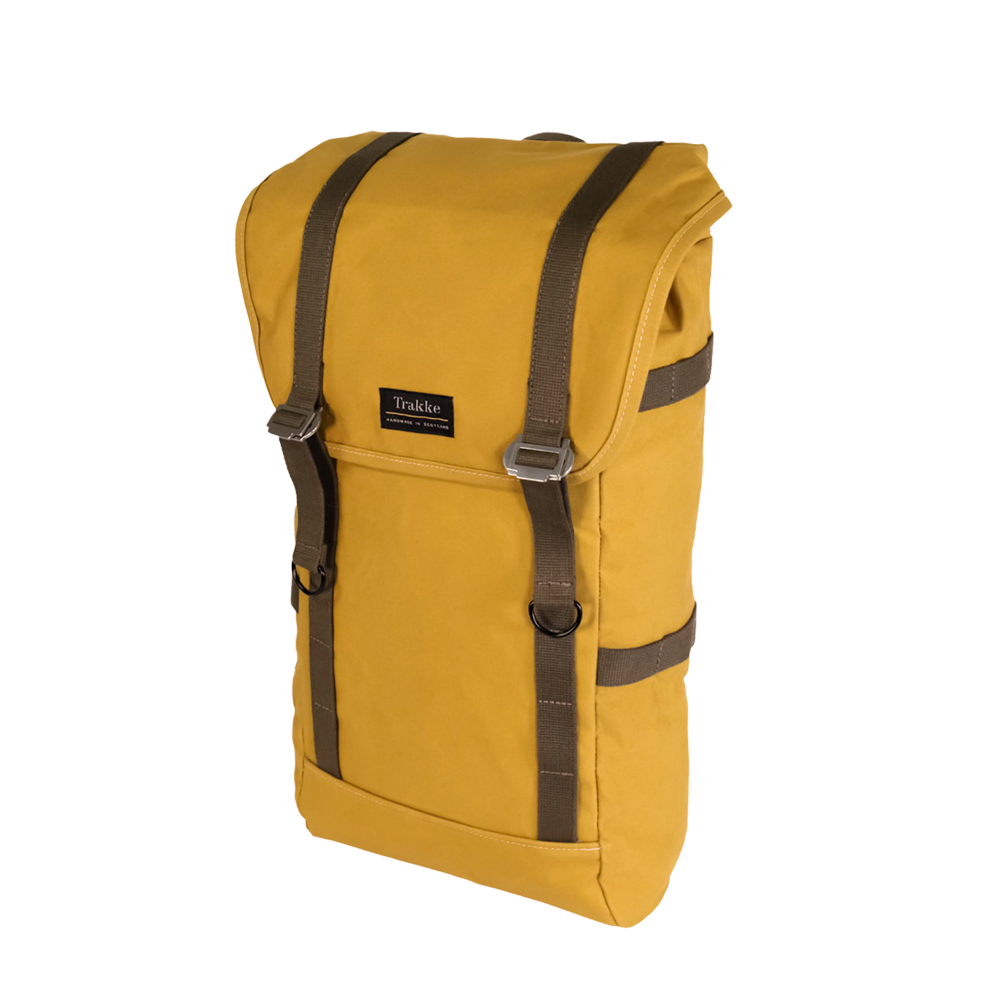

In [ ]:
#show image
from IPython.display import display # to display images

img = Image.open('/content/data/test/backpack/00000027.png')
display(img)

In [ ]:
test_image = image.img_to_array(test_image)

NameError: ignored

In [ ]:
test_image = np.expand_dims(test_image, axis = 0)

NameError: ignored

In [ ]:
model = load_model('mymodelresnet1.h5')

In [ ]:
result = model.predict(test_image)

NameError: ignored

In [ ]:
result = result[0]

In [ ]:
classes = ['backpack','footwear', 'glasses', 'watch']

label_name = {classes[i]: result[i] for i in range(len(result))}
label_name

NameError: ignored

In [ ]:
output = max(label_name, key=label_name.get)
print(output)

glasses


# New Section

# New Section